In [86]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#reading dataset
data=pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
data.shape

(891, 12)

In [89]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [90]:
#checking unique values
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [91]:
df=data.drop('PassengerId',axis=1)

In [92]:
#checking null values
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [93]:
df.drop('Cabin',axis=1,inplace=True)

In [94]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

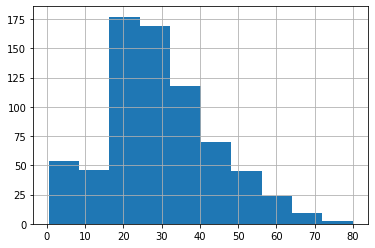

In [95]:
df['Age'].hist()

In [96]:
df['Age'].median()

28.0

In [97]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [98]:
df['Embarked'].mode()

0    S
dtype: object

In [99]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
#converting age column using median and embarked column using mode

In [100]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [101]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [102]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [103]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [106]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [107]:
#splitting data into features and target
x=df.drop('Survived',axis=1)
y=df['Survived']

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

# SVM

In [111]:
from sklearn.svm import SVC

In [112]:
svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)

In [113]:
precision_score(y_test,svm_pred)

0.7536231884057971

In [114]:
accuracy_score(y_test,svm_pred)

0.7821229050279329

# KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
metric_k=[]
neighbors=range(3,18)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(x_train,y_train)
  y_pred_KNN=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred_KNN)
  metric_k.append(acc)

In [117]:
metric_k

[0.7150837988826816,
 0.7262569832402235,
 0.7039106145251397,
 0.7318435754189944,
 0.7262569832402235,
 0.7206703910614525,
 0.7206703910614525,
 0.7150837988826816,
 0.7374301675977654,
 0.7206703910614525,
 0.7262569832402235,
 0.7318435754189944,
 0.7262569832402235,
 0.7430167597765364,
 0.7374301675977654]

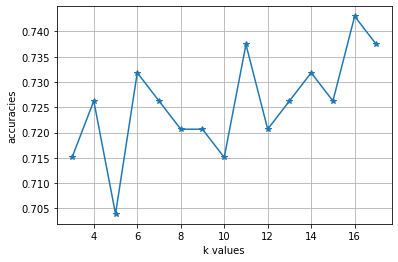

In [118]:
plt.plot(neighbors,metric_k,'*-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [119]:
classifier=KNeighborsClassifier(n_neighbors=16)
classifier=classifier.fit(x_train,y_train)
y_pred_KNN=classifier.predict(x_test)

In [121]:
precision_score(y_test,y_pred_KNN)

0.7916666666666666

In [122]:
accuracy_score(y_test,y_pred_KNN)

0.7430167597765364

# Cross Validation on SVM model

# Stratified K-Fold Cross Validation-SVM Model

In [123]:
from sklearn.model_selection import StratifiedKFold

In [124]:
skfold_validator=StratifiedKFold(n_splits=10)

In [125]:
for train_index,test_index in skfold_validator.split(x,y):
  print('Training index:',train_index)
  print('Test index:',test_index) 

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
skcv_result=cross_val_score(svm_model,x,y,cv=skfold_validator)

In [128]:
skcv_result 

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [129]:
np.mean(skcv_result)

0.786729088639201

# K-fold Cross Validation on SVM Model

In [130]:
from sklearn.model_selection import KFold

In [131]:
kfold_validator=KFold(10)

In [132]:
for train_index,test_index in kfold_validator.split(x,y):
  print('Training index:',train_index)
  print('Test index:',test_index)  

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
cv_result=cross_val_score(svm_model,x,y,cv=kfold_validator)

In [135]:
cv_result

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [136]:
np.mean(cv_result)

0.786729088639201

# Cross Validation on KNN Model

# Stratified KFold Cross Validation on KNN Model

In [68]:
from sklearn.model_selection import StratifiedKFold

In [70]:
skfold_validator=StratifiedKFold(n_splits=10)

In [72]:
for train_index,test_index in skfold_validator.split(x,y):
 print('Training Index:',train_index)
 print('Testing Index:',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [73]:
skcv_result=cross_val_score(classifier,x,y,cv=skfold_validator)

In [74]:
skcv_result

array([0.63333333, 0.65168539, 0.66292135, 0.78651685, 0.69662921,
       0.71910112, 0.73033708, 0.73033708, 0.7752809 , 0.71910112])

In [75]:
np.mean(skcv_result)

0.7105243445692884

# K-Fold Cross Validation on KNN model

In [76]:
from sklearn.model_selection import KFold

In [77]:
kfold_validator=KFold(10)

In [80]:
for train_index,test_index in kfold_validator.split(x,y):
  print('Trainig Index:',train_index)
  print('Test Index:',test_index)

Trainig Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cv_result=cross_val_score(classifier,x,y,cv=kfold_validator)

In [84]:
cv_result

array([0.61111111, 0.69662921, 0.64044944, 0.74157303, 0.6741573 ,
       0.75280899, 0.68539326, 0.74157303, 0.80898876, 0.74157303])

In [85]:
np.mean(cv_result)

0.7094257178526842